In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df_new1 = pd.read_csv('./data/공공자전거 대여이력_2021.03.csv', engine = 'python')
df_new2 = pd.read_csv('./data/공공자전거 대여이력_2021.04.csv', engine = 'python')
df_new3 = pd.read_csv('./data/공공자전거 대여이력_2021.05.csv', engine = 'python')

In [3]:
df_new = pd.merge(df_new1, df_new2, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new = pd.merge(df_new, df_new3, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-50838,2021-02-28 23:14:47,1203,밀리아나2빌딩 앞,0,2021-03-01 00:00:03,1211,방이삼거리,0,45,3553.80
1,SPB-44343,2021-02-28 23:15:01,4480,가락시장역 롯데마트2,0,2021-03-01 00:00:03,3579,광진 캠퍼스시티,0,45,10426.18
2,SPB-33391,2021-02-28 23:32:33,1336,성북3교 위,0,2021-03-01 00:00:05,346,맥스타일 앞,0,27,3773.41
3,SPB-43223,2021-02-28 23:06:35,1012,서울 상운차량,0,2021-03-01 00:00:07,1002,해공공원(천호동),0,53,2695.24
4,SPB-32340,2021-02-28 23:18:18,2312,청담역 13번 출구 앞,0,2021-03-01 00:00:09,2503,반포1동 서초빌딩 앞,0,41,9092.37
...,...,...,...,...,...,...,...,...,...,...,...
8134833,SPB-31282,2021-05-31 23:48:22,2190,도원맨션,0,2021-05-31 23:59:57,2102,봉림교 교통섬,0,11,1145.32
8134834,SPB-50316,2021-05-31 23:55:04,1106,신방화사거리,0,2021-05-31 23:59:57,1103,방화역 4번출구앞,0,4,639.19
8134835,SPB-44035,2021-05-31 23:51:12,1627,수락산역 4번출구,0,2021-05-31 23:59:58,1727,서울도봉초등학교인근,0,8,1383.25
8134836,SPB-50409,2021-05-31 23:31:37,1008,암사역 3번출구(국민은행앞),0,2021-05-31 23:59:58,544,광남중학교,0,28,3234.21


In [4]:
df_new['대여대여소명'].unique()

array(['밀리아나2빌딩 앞', '가락시장역 롯데마트2', '성북3교 위', ..., '?첩꽁훈컵㈔?맞은편',
       'LIG강?潔팎컷? 103동앞', '탐앤탐??을지로3가점'], dtype=object)

In [5]:
df = df_new[~df_new['대여대여소명'].str.contains('\?')]
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-50838,2021-02-28 23:14:47,1203,밀리아나2빌딩 앞,0,2021-03-01 00:00:03,1211,방이삼거리,0,45,3553.80
1,SPB-44343,2021-02-28 23:15:01,4480,가락시장역 롯데마트2,0,2021-03-01 00:00:03,3579,광진 캠퍼스시티,0,45,10426.18
2,SPB-33391,2021-02-28 23:32:33,1336,성북3교 위,0,2021-03-01 00:00:05,346,맥스타일 앞,0,27,3773.41
3,SPB-43223,2021-02-28 23:06:35,1012,서울 상운차량,0,2021-03-01 00:00:07,1002,해공공원(천호동),0,53,2695.24
4,SPB-32340,2021-02-28 23:18:18,2312,청담역 13번 출구 앞,0,2021-03-01 00:00:09,2503,반포1동 서초빌딩 앞,0,41,9092.37
...,...,...,...,...,...,...,...,...,...,...,...
8134833,SPB-31282,2021-05-31 23:48:22,2190,도원맨션,0,2021-05-31 23:59:57,2102,봉림교 교통섬,0,11,1145.32
8134834,SPB-50316,2021-05-31 23:55:04,1106,신방화사거리,0,2021-05-31 23:59:57,1103,방화역 4번출구앞,0,4,639.19
8134835,SPB-44035,2021-05-31 23:51:12,1627,수락산역 4번출구,0,2021-05-31 23:59:58,1727,서울도봉초등학교인근,0,8,1383.25
8134836,SPB-50409,2021-05-31 23:31:37,1008,암사역 3번출구(국민은행앞),0,2021-05-31 23:59:58,544,광남중학교,0,28,3234.21


In [6]:
df['대여대여소명'].unique()

array(['밀리아나2빌딩 앞', '가락시장역 롯데마트2', '성북3교 위', ..., 'kt 행당빌딩 앞',
       '중랑데시앙플렉스 앞', '이랜드글로벌R&D센터'], dtype=object)

In [7]:
df['반납대여소명'].unique()

array(['방이삼거리', '광진 캠퍼스시티', '맥스타일 앞', ..., '서울방?絹?고분군', '?도였諭?북단',
       '신방화??8번출구'], dtype=object)

In [8]:
df_new = df[~df['반납대여소명'].str.contains('\?')]
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-50838,2021-02-28 23:14:47,1203,밀리아나2빌딩 앞,0,2021-03-01 00:00:03,1211,방이삼거리,0,45,3553.80
1,SPB-44343,2021-02-28 23:15:01,4480,가락시장역 롯데마트2,0,2021-03-01 00:00:03,3579,광진 캠퍼스시티,0,45,10426.18
2,SPB-33391,2021-02-28 23:32:33,1336,성북3교 위,0,2021-03-01 00:00:05,346,맥스타일 앞,0,27,3773.41
3,SPB-43223,2021-02-28 23:06:35,1012,서울 상운차량,0,2021-03-01 00:00:07,1002,해공공원(천호동),0,53,2695.24
4,SPB-32340,2021-02-28 23:18:18,2312,청담역 13번 출구 앞,0,2021-03-01 00:00:09,2503,반포1동 서초빌딩 앞,0,41,9092.37
...,...,...,...,...,...,...,...,...,...,...,...
8134833,SPB-31282,2021-05-31 23:48:22,2190,도원맨션,0,2021-05-31 23:59:57,2102,봉림교 교통섬,0,11,1145.32
8134834,SPB-50316,2021-05-31 23:55:04,1106,신방화사거리,0,2021-05-31 23:59:57,1103,방화역 4번출구앞,0,4,639.19
8134835,SPB-44035,2021-05-31 23:51:12,1627,수락산역 4번출구,0,2021-05-31 23:59:58,1727,서울도봉초등학교인근,0,8,1383.25
8134836,SPB-50409,2021-05-31 23:31:37,1008,암사역 3번출구(국민은행앞),0,2021-05-31 23:59:58,544,광남중학교,0,28,3234.21


In [9]:
df_new['반납대여소명'].unique()

array(['방이삼거리', '광진 캠퍼스시티', '맥스타일 앞', ..., '돌곶이역 앞', '중랑데시앙플렉스 앞',
       '이랜드글로벌R&D센터'], dtype=object)

In [10]:
df_new = df_new.drop(['자전거번호', '대여거치대', '반납거치대', '이용거리'], axis = 1)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간
0,2021-02-28 23:14:47,1203,밀리아나2빌딩 앞,2021-03-01 00:00:03,1211,방이삼거리,45
1,2021-02-28 23:15:01,4480,가락시장역 롯데마트2,2021-03-01 00:00:03,3579,광진 캠퍼스시티,45
2,2021-02-28 23:32:33,1336,성북3교 위,2021-03-01 00:00:05,346,맥스타일 앞,27
3,2021-02-28 23:06:35,1012,서울 상운차량,2021-03-01 00:00:07,1002,해공공원(천호동),53
4,2021-02-28 23:18:18,2312,청담역 13번 출구 앞,2021-03-01 00:00:09,2503,반포1동 서초빌딩 앞,41


In [11]:
df_new['대여일시'] = pd.to_datetime(df_new['대여일시'])
df_new['반납일시'] = pd.to_datetime(df_new['반납일시'])

df_new['대여월'] = df_new['대여일시'].dt.month
df_new['대여일'] = df_new['대여일시'].dt.day
df_new['대여요일'] = df_new['대여일시'].dt.dayofweek
df_new['대여시간'] = df_new['대여일시'].dt.hour
df_new['대여시간_분'] = df_new['대여일시'].dt.minute

df_new['반납월'] = df_new['반납일시'].dt.month
df_new['반납일'] = df_new['반납일시'].dt.day
df_new['반납요일'] = df_new['반납일시'].dt.dayofweek
df_new['반납시간'] = df_new['반납일시'].dt.hour
df_new['반납시간_분'] = df_new['반납일시'].dt.minute

In [12]:
df_new = df_new.sort_values('대여일시', ignore_index = True)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-02-28 17:18:57,1021,강일동 리슈빌 빌딩앞,2021-03-01 02:10:18,1021,강일동 리슈빌 빌딩앞,531,2,28,6,17,18,3,1,0,2,10
1,2021-02-28 18:58:50,609,제기2교,2021-03-01 00:47:02,637,KAIST 경영대학 앞,348,2,28,6,18,58,3,1,0,0,47
2,2021-02-28 19:55:57,1153,"발산역 1번, 9번 인근 대여소",2021-03-01 01:14:54,2743,동신아파트 104동 앞,318,2,28,6,19,55,3,1,0,1,14
3,2021-02-28 20:39:41,1204,거여역 3번출구,2021-03-01 00:19:54,1204,거여역 3번출구,220,2,28,6,20,39,3,1,0,0,19
4,2021-02-28 21:10:33,2525,반포쇼핑타운 2동 앞,2021-03-01 00:13:28,2301,현대고등학교 건너편,182,2,28,6,21,10,3,1,0,0,13


In [13]:
df_new = df_new[df_new['대여월'] != 2]

In [14]:
df_rental = df_new[['대여일시', '대여대여소명','대여대여소번호', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여대여소번호,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-03-01 00:00:01,장한평역 1번출구 (국민은행앞),646,3,1,0,0,0
1,2021-03-01 00:00:02,스타벅스앞,1117,3,1,0,0,0
2,2021-03-01 00:00:06,홍은사거리,117,3,1,0,0,0
3,2021-03-01 00:00:08,은천치안센터,2108,3,1,0,0,0
4,2021-03-01 00:00:10,홍대입구역 3번출구,3010,3,1,0,0,0


In [15]:
df_rental2 = df_rental.groupby(['대여대여소명','대여대여소번호','대여시간']).size().reset_index().rename(columns = {0 : 'rent_count'})
df_rental2['rent_count'] = df_rental2['rent_count'] / 92     # 3월, 4월, 5월 합친 것이므로 나누기 92
df_rental2['mu_15'] = df_rental2['rent_count'] / 4
df_rental2

,대여대여소명,대여대여소번호,대여시간,rent_count,mu_15
0,(구)신한은행 중랑교지점,1442,0,1.391304,0.347826
1,(구)신한은행 중랑교지점,1442,1,1.271739,0.317935
2,(구)신한은행 중랑교지점,1442,2,0.847826,0.211957
3,(구)신한은행 중랑교지점,1442,3,0.369565,0.092391
4,(구)신한은행 중랑교지점,1442,4,0.641304,0.160326
...,...,...,...,...,...
56799,힐스테이트에코,2720,19,7.532609,1.883152
56800,힐스테이트에코,2720,20,6.130435,1.532609
56801,힐스테이트에코,2720,21,5.097826,1.274457
56802,힐스테이트에코,2720,22,2.597826,0.649457


In [16]:
df_return = df_new[['반납일시', '반납대여소명', '반납대여소번호','반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.reset_index(drop = True, inplace = True)
df_return

,반납일시,반납대여소명,반납대여소번호,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-03-01 00:09:08,장안동 사거리,602,3,1,0,0,9
1,2021-03-01 00:07:35,KBS 스포츠월드,1182,3,1,0,0,7
2,2021-03-01 00:07:35,홍은동 정원여중 입구,188,3,1,0,0,7
3,2021-03-01 00:54:45,중앙동 동진빌딩,2119,3,1,0,0,54
4,2021-03-01 00:17:33,마포구민체육센터 앞,152,3,1,0,0,17
...,...,...,...,...,...,...,...,...
8117071,2021-05-31 23:59:57,방화역 4번출구앞,1103,5,31,0,23,59
8117072,2021-05-31 23:59:27,석촌호교차로 (스타벅스 앞),1293,5,31,0,23,59
8117073,2021-05-31 23:59:27,도봉세무서 앞,1560,5,31,0,23,59
8117074,2021-05-31 23:58:12,동대문롯데캐슬아파트 앞,657,5,31,0,23,58


In [17]:
df_c = df_return.groupby(['반납대여소명','반납대여소번호','반납시간']).size().reset_index().rename(columns = {0 : 'return_count'})
df_c['return_count'] = df_c['return_count'] / 92     # 3월, 4월, 5월 합친 것이므로 나누기 92
df_c['lambda15'] = df_c['return_count']/ 4
df_c = df_c.sort_values('lambda15', ascending = False).reset_index(drop = True)
df_c.columns = ['대여소명','대여소번호','시간','return_count','lambda15']
df_c

,대여소명,대여소번호,시간,return_count,lambda15
0,뚝섬유원지역 1번출구 앞,502,18,63.684783,15.921196
1,뚝섬유원지역 1번출구 앞,502,17,60.032609,15.008152
2,여의나루역 1번출구 앞,207,18,59.163043,14.790761
3,여의나루역 1번출구 앞,207,17,58.369565,14.592391
4,뚝섬유원지역 1번출구 앞,502,19,53.434783,13.358696
...,...,...,...,...,...
56535,서남병원 후문,782,4,0.010870,0.002717
56536,두산건설 본사,2347,1,0.010870,0.002717
56537,서남환경공원 버스정류장,1113,4,0.010870,0.002717
56538,참새공원(백곡경노당),1967,4,0.010870,0.002717


In [18]:
return_ubound = pd.DataFrame(df_c.groupby(['대여소명','대여소번호'])['return_count'].agg(lambda x : np.floor(np.percentile(x,75)+(np.percentile(x,75)-np.percentile(x,25))*1.5))).reset_index().rename(columns = {'return_count' : 'upperbound'})
return_ubound

,대여소명,대여소번호,upperbound
0,(구)신한은행 중랑교지점,1442,7.0
1,(구)합정동 주민센터,101,0.0
2,(시립)고덕평생학습관,1070,2.0
3,(재)FITI시험연구원,2724,6.0
4,3호선 매봉역 3번출구앞,2335,6.0
...,...,...,...
2406,흑석한강푸르지오(110동),2092,0.0
2407,흥국사 정류장,991,0.0
2408,희성오피앙,1639,6.0
2409,희훈타워빌 앞,3905,5.0


In [19]:
df_rental2.columns = ['대여소명','대여소번호','시간','rent_count','mu_15']
df = pd.merge(df_c, df_rental2, on=['대여소명','대여소번호','시간'], how='outer')
df.tail()

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15
57293,흑석동효사정앞,4153,5,NaN,NaN,0.021739,0.005435
57294,흑석동효사정앞,4153,8,NaN,NaN,0.423913,0.105978
57295,흑석한강푸르지오(110동),2092,3,NaN,NaN,0.010870,0.002717
57296,흑석한강푸르지오(110동),2092,4,NaN,NaN,0.010870,0.002717
57297,흥국사 정류장,991,5,NaN,NaN,0.010870,0.002717


In [20]:
stops = df[['대여소명','대여소번호']].drop_duplicates().reset_index(drop=True)
Dayhour = pd.DataFrame({'시간':np.repeat(np.arange(24), len(stops))})
stops2 = pd.concat([stops] * 24).reset_index(drop=True)
Dayhour_frame = pd.concat([stops2,Dayhour],axis=1)

In [21]:
df = pd.merge(df,Dayhour_frame, on = ['대여소명','대여소번호','시간'],how='outer')
df = pd.merge(df, return_ubound, on=['대여소명','대여소번호'], how='outer')
df.fillna(0, inplace=True)
df.head(5)

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,뚝섬유원지역 1번출구 앞,502,18,63.684783,15.921196,52.489130,13.122283,84.0
1,뚝섬유원지역 1번출구 앞,502,17,60.032609,15.008152,45.891304,11.472826,84.0
2,뚝섬유원지역 1번출구 앞,502,19,53.434783,13.358696,43.586957,10.896739,84.0
3,뚝섬유원지역 1번출구 앞,502,16,50.945652,12.736413,45.663043,11.415761,84.0
4,뚝섬유원지역 1번출구 앞,502,20,44.836957,11.209239,36.152174,9.038043,84.0


In [22]:
df = df.sort_values(['대여소명', '대여소번호', '시간'], ignore_index = True)
df

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,(구)신한은행 중랑교지점,1442,0,1.750000,0.437500,1.391304,0.347826,7.0
1,(구)신한은행 중랑교지점,1442,1,1.000000,0.250000,1.271739,0.317935,7.0
2,(구)신한은행 중랑교지점,1442,2,0.706522,0.176630,0.847826,0.211957,7.0
3,(구)신한은행 중랑교지점,1442,3,0.369565,0.092391,0.369565,0.092391,7.0
4,(구)신한은행 중랑교지점,1442,4,0.358696,0.089674,0.641304,0.160326,7.0
...,...,...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,6.195652,1.548913,7.532609,1.883152,11.0
57884,힐스테이트에코,2720,20,3.956522,0.989130,6.130435,1.532609,11.0
57885,힐스테이트에코,2720,21,3.173913,0.793478,5.097826,1.274457,11.0
57886,힐스테이트에코,2720,22,1.902174,0.475543,2.597826,0.649457,11.0


In [23]:
df = df.drop(['return_count', 'rent_count'], axis = 1)
df = df.rename(columns = {'lambda15' : 'lambda_15', 'upperbound' : 'c'})
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0
...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,1.548913,1.883152,11.0
57884,힐스테이트에코,2720,20,0.989130,1.532609,11.0
57885,힐스테이트에코,2720,21,0.793478,1.274457,11.0
57886,힐스테이트에코,2720,22,0.475543,0.649457,11.0


In [24]:
df['rho'] = float(-1)

for i in range(len(df)):
    if df['mu_15'][i] == 0:
        df['rho'][i] = 0
    else:
        df['rho'][i] = df['lambda_15'][i] / df['mu_15'][i]
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0,1.257812
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0,0.786325
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0,0.833333
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0,1.000000
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0,0.559322
...,...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,1.548913,1.883152,11.0,0.822511
57884,힐스테이트에코,2720,20,0.989130,1.532609,11.0,0.645390
57885,힐스테이트에코,2720,21,0.793478,1.274457,11.0,0.622601
57886,힐스테이트에코,2720,22,0.475543,0.649457,11.0,0.732218


In [25]:
# p_c: 대여소에 자전거가 c개(최대거치용량) 있을 확률

df['p_c'] = float(-1)

for i in range(len(df)):
    if df['rho'][i] == 1:
        df['p_c'][i] = 1 / (1 + df['c'][i]) 
    else:
        df['p_c'][i] = (df['rho'][i]**df['c'][i]) * ((1 - df['rho'][i]) / (1 - (df['rho'][i]**(df['c'][i] + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0,1.257812,0.243899
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0,0.786325,0.046515
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0,0.833333,0.060609
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0,1.000000,0.125000
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0,0.559322,0.007620
...,...,...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,1.548913,1.883152,11.0,0.822511,0.022882
57884,힐스테이트에코,2720,20,0.989130,1.532609,11.0,0.645390,0.002884
57885,힐스테이트에코,2720,21,0.793478,1.274457,11.0,0.622601,0.002063
57886,힐스테이트에코,2720,22,0.475543,0.649457,11.0,0.732218,0.008897


In [26]:
# L_s : 대여소 내 평균 자전거 수

df['L_s'] = float(-1)

for i in range(len(df)):
    rho = df['rho'][i]
    c = df['c'][i]
    if df['rho'][i] == 1:
        df['L_s'][i] = c / 2
    else:
        df['L_s'][i] = (rho / (1 - rho)) * ((1 - ((c + 1) * rho**c) + (c * rho**(c + 1))) / (1 - (rho**(c + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0,1.257812,0.243899,4.640655
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0,0.786325,0.046515,2.310610
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0,0.833333,0.060609,2.575623
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0,1.000000,0.125000,3.500000
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0,0.559322,0.007620,1.191862
...,...,...,...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,1.548913,1.883152,11.0,0.822511,0.022882,3.361665
57884,힐스테이트에코,2720,20,0.989130,1.532609,11.0,0.645390,0.002884,1.757003
57885,힐스테이트에코,2720,21,0.793478,1.274457,11.0,0.622601,0.002063,1.608869
57886,힐스테이트에코,2720,22,0.475543,0.649457,11.0,0.732218,0.008897,2.442429


In [27]:
# L_q : 대기행렬 내 평균 자전거 수

df['L_q'] = float(-1)

for i in range(len(df)):
    df['L_q'][i] = df['L_s'][i] - (df['rho'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0,1.257812,0.243899,4.640655,3.689621
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0,0.786325,0.046515,2.310610,1.560861
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0,0.833333,0.060609,2.575623,1.792798
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0,1.000000,0.125000,3.500000,2.625000
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0,0.559322,0.007620,1.191862,0.636802
...,...,...,...,...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,1.548913,1.883152,11.0,0.822511,0.022882,3.361665,2.557975
57884,힐스테이트에코,2720,20,0.989130,1.532609,11.0,0.645390,0.002884,1.757003,1.113474
57885,힐스테이트에코,2720,21,0.793478,1.274457,11.0,0.622601,0.002063,1.608869,0.987552
57886,힐스테이트에코,2720,22,0.475543,0.649457,11.0,0.732218,0.008897,2.442429,1.716726


In [28]:
# W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

df['W_s'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_s'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_s'][i] = df['L_s'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0,1.257812,0.243899,4.640655,3.689621,14.028823
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0,0.786325,0.046515,2.310610,1.560861,9.693323
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0,0.833333,0.060609,2.575623,1.792798,15.522818
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0,1.000000,0.125000,3.500000,2.625000,43.294118
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0,0.559322,0.007620,1.191862,0.636802,13.393119
...,...,...,...,...,...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,1.548913,1.883152,11.0,0.822511,0.022882,3.361665,2.557975,2.221163
57884,힐스테이트에코,2720,20,0.989130,1.532609,11.0,0.645390,0.002884,1.757003,1.113474,1.781449
57885,힐스테이트에코,2720,21,0.793478,1.274457,11.0,0.622601,0.002063,1.608869,0.987552,2.031808
57886,힐스테이트에코,2720,22,0.475543,0.649457,11.0,0.732218,0.008897,2.442429,1.716726,5.182187


In [29]:
# W_q : 대기행렬 내 평균대기시간

df['W_q'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_q'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_q'][i] = df['L_q'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0,1.257812,0.243899,4.640655,3.689621,14.028823,11.153823
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0,0.786325,0.046515,2.310610,1.560861,9.693323,6.548023
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0,0.833333,0.060609,2.575623,1.792798,15.522818,10.804870
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0,1.000000,0.125000,3.500000,2.625000,43.294118,32.470588
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0,0.559322,0.007620,1.191862,0.636802,13.393119,7.155831
...,...,...,...,...,...,...,...,...,...,...,...,...
57883,힐스테이트에코,2720,19,1.548913,1.883152,11.0,0.822511,0.022882,3.361665,2.557975,2.221163,1.690139
57884,힐스테이트에코,2720,20,0.989130,1.532609,11.0,0.645390,0.002884,1.757003,1.113474,1.781449,1.128967
57885,힐스테이트에코,2720,21,0.793478,1.274457,11.0,0.622601,0.002063,1.608869,0.987552,2.031808,1.247160
57886,힐스테이트에코,2720,22,0.475543,0.649457,11.0,0.732218,0.008897,2.442429,1.716726,5.182187,3.642438


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57888 entries, 0 to 57887
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소명       57888 non-null  object 
 1   대여소번호      57888 non-null  int64  
 2   시간         57888 non-null  int64  
 3   lambda_15  57888 non-null  float64
 4   mu_15      57888 non-null  float64
 5   c          57888 non-null  float64
 6   rho        57888 non-null  float64
 7   p_c        57888 non-null  float64
 8   L_s        57888 non-null  float64
 9   L_q        57888 non-null  float64
 10  W_s        57888 non-null  float64
 11  W_q        57888 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 5.3+ MB


In [31]:
# 일부 칼럼 타입 카테고리로 변환

df = df.astype({'대여소명' : 'category', '대여소번호' : 'category'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57888 entries, 0 to 57887
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소명       57888 non-null  category
 1   대여소번호      57888 non-null  category
 2   시간         57888 non-null  int64   
 3   lambda_15  57888 non-null  float64 
 4   mu_15      57888 non-null  float64 
 5   c          57888 non-null  float64 
 6   rho        57888 non-null  float64 
 7   p_c        57888 non-null  float64 
 8   L_s        57888 non-null  float64 
 9   L_q        57888 non-null  float64 
 10  W_s        57888 non-null  float64 
 11  W_q        57888 non-null  float64 
dtypes: category(2), float64(9), int64(1)
memory usage: 4.8 MB


In [33]:
station = pd.read_csv('./대학원/데이터/정리 데이터/공공자전거 대여소 정보(21.06월 기준).csv')
station.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [34]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소 번호     2467 non-null   int64  
 1   보관소(대여소)명  2467 non-null   object 
 2   자치구        2467 non-null   object 
 3   상세주소       2467 non-null   object 
 4   위도         2467 non-null   float64
 5   경도         2467 non-null   float64
 6   설치 시기      2467 non-null   object 
 7   LCD 거치대수   1454 non-null   float64
 8   QR 거치대수    1014 non-null   float64
 9   운영 방식      2467 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 192.9+ KB


In [35]:
station = station.astype({'자치구' : 'category', '대여소 번호' : 'category'})

In [36]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소 번호     2467 non-null   category
 1   보관소(대여소)명  2467 non-null   object  
 2   자치구        2467 non-null   category
 3   상세주소       2467 non-null   object  
 4   위도         2467 non-null   float64 
 5   경도         2467 non-null   float64 
 6   설치 시기      2467 non-null   object  
 7   LCD 거치대수   1454 non-null   float64 
 8   QR 거치대수    1014 non-null   float64 
 9   운영 방식      2467 non-null   object  
dtypes: category(2), float64(4), object(4)
memory usage: 261.6+ KB


In [37]:
station = station.rename(columns = {'대여소 번호' : '대여소번호'})
station

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2462,4864,송파사거리,송파구,송파구 송파동 97-2,37.502056,127.110550,2021-04-27,NaN,6.0,QR
2463,4865,한성백제역 1번출구 뒤,송파구,송파구 방이동 45-4,37.516342,127.115593,2021-04-28,NaN,5.0,QR
2464,4867,가락대림아파트 앞,송파구,송파구 가락동 94-9,37.500027,127.118431,2021-04-28,NaN,10.0,QR
2465,4868,레이크 호텔 앞,송파구,송파구 석촌동 158,37.507172,127.101242,2021-05-18,NaN,7.0,QR


In [38]:
before_merged = len(df)

df = pd.merge(df, station[['자치구', '대여소번호']], on = '대여소번호')
df.head()

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q,자치구
0,(구)신한은행 중랑교지점,1442,0,0.437500,0.347826,7.0,1.257812,0.243899,4.640655,3.689621,14.028823,11.153823,중랑구
1,(구)신한은행 중랑교지점,1442,1,0.250000,0.317935,7.0,0.786325,0.046515,2.310610,1.560861,9.693323,6.548023,중랑구
2,(구)신한은행 중랑교지점,1442,2,0.176630,0.211957,7.0,0.833333,0.060609,2.575623,1.792798,15.522818,10.804870,중랑구
3,(구)신한은행 중랑교지점,1442,3,0.092391,0.092391,7.0,1.000000,0.125000,3.500000,2.625000,43.294118,32.470588,중랑구
4,(구)신한은행 중랑교지점,1442,4,0.089674,0.160326,7.0,0.559322,0.007620,1.191862,0.636802,13.393119,7.155831,중랑구


In [39]:
df = df.drop(['대여소번호', 'c'], axis = 1)
df = df[['자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'p_c', 'L_s', 'L_q', 'W_s', 'W_q']]
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.437500,0.347826,1.257812,0.243899,4.640655,3.689621,14.028823,11.153823
1,중랑구,(구)신한은행 중랑교지점,1,0.250000,0.317935,0.786325,0.046515,2.310610,1.560861,9.693323,6.548023
2,중랑구,(구)신한은행 중랑교지점,2,0.176630,0.211957,0.833333,0.060609,2.575623,1.792798,15.522818,10.804870
3,중랑구,(구)신한은행 중랑교지점,3,0.092391,0.092391,1.000000,0.125000,3.500000,2.625000,43.294118,32.470588
4,중랑구,(구)신한은행 중랑교지점,4,0.089674,0.160326,0.559322,0.007620,1.191862,0.636802,13.393119,7.155831


In [40]:
df.to_excel('./봄 대여소별 Ls, Lq, Ws, Wq.xlsx', index = False)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [41]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.437500,0.347826,1.257812,4.640655,14.028823
1,중랑구,(구)신한은행 중랑교지점,1,0.250000,0.317935,0.786325,2.310610,9.693323
2,중랑구,(구)신한은행 중랑교지점,2,0.176630,0.211957,0.833333,2.575623,15.522818
3,중랑구,(구)신한은행 중랑교지점,3,0.092391,0.092391,1.000000,3.500000,43.294118
4,중랑구,(구)신한은행 중랑교지점,4,0.089674,0.160326,0.559322,1.191862,13.393119


In [42]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.197899,0.347361,0.285864,0.552219,0.422762,0.545164,0.393356,0.246892,0.432471,0.310983,0.424813,0.32873,0.5194,0.30206,0.250003,0.482411,0.369088,0.431857,0.470038,0.63581,0.277939,0.30564,0.292288,0.220626,0.32955


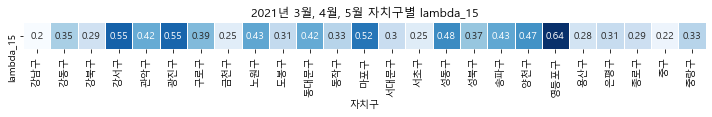

In [43]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [44]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.270244,0.46756,0.292307,0.706547,0.712653,0.966569,0.580068,0.397068,0.488907,0.355068,0.460315,0.460489,0.735139,0.358936,0.440442,0.724075,0.44595,0.573576,0.591973,0.987694,0.4175,0.47011,0.345366,0.268621,0.378296


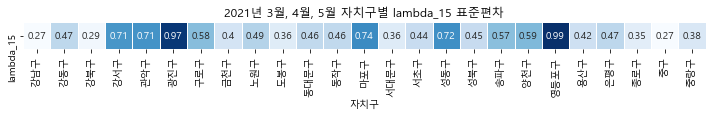

In [45]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [46]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.208385,0.338327,0.287479,0.548033,0.427568,0.540037,0.390404,0.250025,0.43028,0.306247,0.422472,0.32688,0.517997,0.312513,0.252823,0.479511,0.368285,0.428744,0.46407,0.63704,0.278165,0.296261,0.310175,0.236266,0.317891


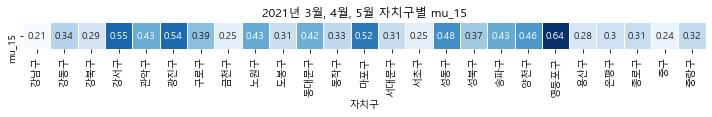

In [47]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [48]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.27352,0.431155,0.2924,0.683599,0.654353,0.846368,0.568845,0.385665,0.474708,0.323701,0.437798,0.39017,0.67443,0.323516,0.400369,0.696167,0.400166,0.572058,0.547819,0.966638,0.392138,0.394369,0.360649,0.28732,0.330371


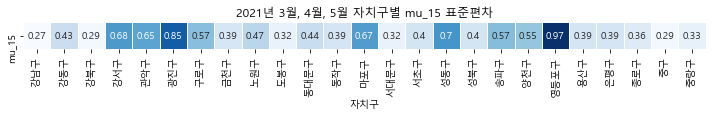

In [49]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [50]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.20442,1.261771,1.236404,1.334318,1.154606,1.276575,1.365689,1.645393,1.175188,1.274511,1.282799,1.182121,1.293124,1.176651,1.14051,1.278244,1.156274,1.243517,1.216565,1.33188,1.300385,1.187724,1.175618,1.208377,1.190689


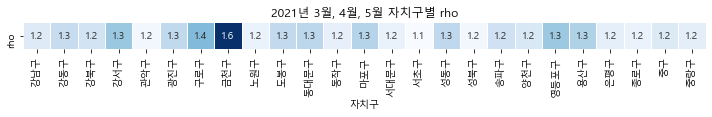

In [51]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 rho')
plt.tight_layout()
plt.show()

In [52]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.981431,1.879867,1.422787,3.165867,2.278788,3.308105,2.039904,1.147708,2.538478,1.78702,2.311763,1.888045,3.314178,1.601059,1.439651,2.947106,2.010725,2.47464,2.747998,3.955096,1.634226,1.725814,1.665382,1.094393,1.80206


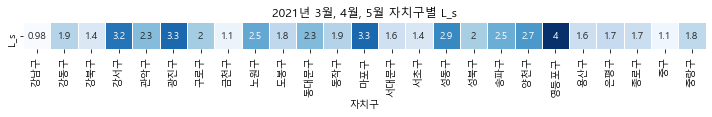

In [53]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [54]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.420189,2.407397,1.414572,3.544096,4.191866,7.592227,2.644531,1.78638,2.810487,2.084571,2.1335,2.877528,5.089712,1.899033,2.920992,4.230831,2.56635,3.174294,3.281764,6.260182,2.521757,2.960893,1.725905,1.211837,1.982764


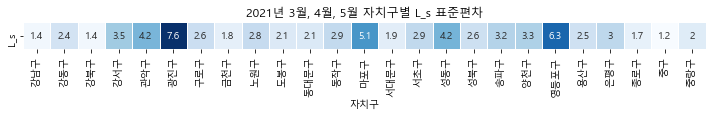

In [55]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [56]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,22.482914,23.111973,16.92884,35.002048,15.844248,26.191743,32.456384,33.868339,24.794762,23.228579,26.096029,19.697797,37.094195,22.40758,25.385227,29.624593,15.848115,32.5275,30.65834,42.561175,34.501473,19.50048,40.888461,37.635932,18.646465


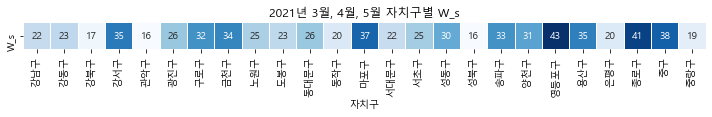

In [57]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [58]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,70.90465,68.789901,44.206167,119.729172,44.234835,89.145829,148.931164,106.682393,74.236663,73.477561,79.912782,67.404631,108.822884,60.281238,89.750384,85.986453,38.825392,120.076862,123.292008,163.350108,190.726792,61.081762,167.677582,139.289066,56.244873


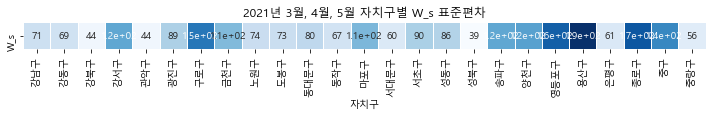

In [59]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [60]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2381,흑석한강푸르지오(110동)
2382,흥국사 정류장
2383,희성오피앙
2384,희훈타워빌 앞


In [61]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [62]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
984,강서구,KC 대학교,0,0.165761,0.019022,8.714286,0.897059,52.571429,학교
985,강서구,KC 대학교,1,0.133152,0.029891,4.454545,0.816667,33.454545,학교
986,강서구,KC 대학교,2,0.008152,0.000000,0.000000,0.000000,0.000000,학교
987,강서구,KC 대학교,3,0.005435,0.005435,1.000000,0.500000,184.000000,학교
988,강서구,KC 대학교,4,0.076087,0.002717,28.000000,0.965517,368.000000,학교
...,...,...,...,...,...,...,...,...,...
57091,동대문구,휘봉고등학교 앞,19,0.559783,0.402174,1.391892,1.216518,3.933425,학교
57092,동대문구,휘봉고등학교 앞,20,0.358696,0.230978,1.552941,1.284340,6.962971,학교
57093,동대문구,휘봉고등학교 앞,21,0.317935,0.198370,1.602740,1.303349,8.145350,학교
57094,동대문구,휘봉고등학교 앞,22,0.489130,0.157609,3.103448,1.628430,11.143437,학교


In [63]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.135870,0.103261,1.315789,4.034395,41.308136,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.084239,0.100543,0.837838,2.310090,29.774720,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.040761,0.054348,0.750000,1.921674,49.696941,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.021739,0.040761,0.533333,1.055870,49.103966,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.046196,0.027174,1.700000,4.746281,177.771493,지하철
...,...,...,...,...,...,...,...,...,...
57211,동작구,흑석역 4번출구,19,0.535326,0.391304,1.368056,1.205578,4.031932,지하철
57212,동작구,흑석역 4번출구,20,0.317935,0.328804,0.966942,0.977593,4.536426,지하철
57213,동작구,흑석역 4번출구,21,0.331522,0.342391,0.968254,0.978496,4.357399,지하철
57214,동작구,흑석역 4번출구,22,0.364130,0.366848,0.992593,0.995043,4.083822,지하철


In [64]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
456,서대문구,DMC센트럴아이파크아파트,0,0.323370,0.260870,1.239583,3.827760,15.752262,아파트
457,서대문구,DMC센트럴아이파크아파트,1,0.225543,0.179348,1.257576,3.878927,23.126783,아파트
458,서대문구,DMC센트럴아이파크아파트,2,0.119565,0.097826,1.222222,3.776953,41.617119,아파트
459,서대문구,DMC센트럴아이파크아파트,3,0.065217,0.057065,1.142857,3.526351,68.084357,아파트
460,서대문구,DMC센트럴아이파크아파트,4,0.021739,0.040761,0.533333,1.055870,49.103966,아파트
...,...,...,...,...,...,...,...,...,...
56995,동대문구,휘경sk뷰아파트 앞,19,0.597826,0.489130,1.222222,1.748020,4.360576,아파트
56996,동대문구,휘경sk뷰아파트 앞,20,0.489130,0.391304,1.250000,1.775068,5.488160,아파트
56997,동대문구,휘경sk뷰아파트 앞,21,0.423913,0.377717,1.122302,1.643686,5.498161,아파트
56998,동대문구,휘경sk뷰아파트 앞,22,0.369565,0.258152,1.431579,1.932882,8.654558,아파트


In [65]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2856,마포구,가온문화공원,0,0.046196,0.046196,1.000000,2.000000,54.117647,공원
2857,마포구,가온문화공원,1,0.013587,0.021739,0.625000,1.139561,89.535004,공원
2858,마포구,가온문화공원,2,0.010870,0.021739,0.500000,0.838710,79.733333,공원
2859,마포구,가온문화공원,3,0.016304,0.013587,1.200000,2.359493,200.617586,공원
2860,마포구,가온문화공원,4,0.005435,0.021739,0.250000,0.328446,60.611765,공원
...,...,...,...,...,...,...,...,...,...
56899,중구,훈련원공원주차장 앞,19,0.538043,0.491848,1.093923,1.611957,4.187812,공원
56900,중구,훈련원공원주차장 앞,20,0.298913,0.453804,0.658683,1.002278,3.811005,공원
56901,중구,훈련원공원주차장 앞,21,0.328804,0.470109,0.699422,1.068554,3.757867,공원
56902,중구,훈련원공원주차장 앞,22,0.334239,0.491848,0.679558,1.036428,3.555294,공원


In [66]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.165761,0.019022,8.714286,0.897059,52.571429,학교
1,강서구,KC 대학교,1,0.133152,0.029891,4.454545,0.816667,33.454545,학교
2,강서구,KC 대학교,2,0.008152,0.000000,0.000000,0.000000,0.000000,학교
3,강서구,KC 대학교,3,0.005435,0.005435,1.000000,0.500000,184.000000,학교
4,강서구,KC 대학교,4,0.076087,0.002717,28.000000,0.965517,368.000000,학교
...,...,...,...,...,...,...,...,...,...
22459,중구,훈련원공원주차장 앞,19,0.538043,0.491848,1.093923,1.611957,4.187812,공원
22460,중구,훈련원공원주차장 앞,20,0.298913,0.453804,0.658683,1.002278,3.811005,공원
22461,중구,훈련원공원주차장 앞,21,0.328804,0.470109,0.699422,1.068554,3.757867,공원
22462,중구,훈련원공원주차장 앞,22,0.334239,0.491848,0.679558,1.036428,3.555294,공원


In [67]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.161427  0.106697  0.066857  0.042625  0.030835  0.042580  0.081769   
아파트  0.182222  0.111341  0.069570  0.041687  0.029434  0.032080  0.044717   
지하철  0.228359  0.157376  0.105052  0.066144  0.049968  0.078283  0.186132   
학교   0.161499  0.102088  0.063505  0.040184  0.027714  0.024568  0.045079   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.187994  0.413088  0.264732  0.231495  0.276298  0.372687  0.398289   
아파트  0.147208  0.288404  0.188053  0.178831  0.220505  0.299671  0.309374   
지하철  0.444217  0.757821  0.484432  0.399401  0.476592  0.587368  0.633232   
학교   0.164681  0.322513  0.203209  0.183219  0.208737  0.281418  0.291673   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.436983  0.513834  0.624910  0.733179  0.940083  0.759163  0.570787   
아파트  0.326159  0.379004  0.481435  0.609910  0.880519  0.707904  0.524529   
지하철  0.668859  0.762636  0.919153  1.193002  1.516826  1.103813  0.796919   
학교   0.308126  0.349073  0.417734  0.509194  0.694368  0.572774  0.418944   

                                   
시간         21        22        23  
특성                                 
공원   0.543838  0.536449  0.296218  
아파트  0.510930  0.535146  0.295474  
지하철  0.694229  0.647034  0.368897  
학교   0.413192  0.415854  0.255863

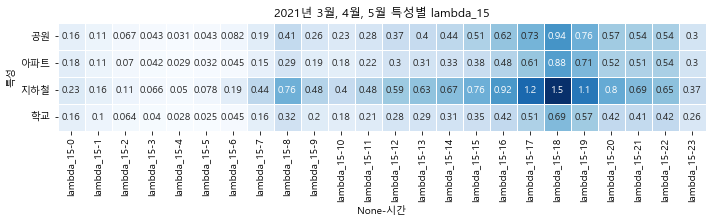

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.162605  0.105381  0.070514  0.044246  0.035374  0.088476  0.110532   
아파트  0.155310  0.093656  0.058213  0.043027  0.030958  0.043764  0.056058   
지하철  0.250214  0.163131  0.104475  0.066702  0.054566  0.096401  0.232034   
학교   0.151586  0.102843  0.074110  0.046423  0.036560  0.030113  0.058394   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.300602  0.520941  0.316255  0.232331  0.250951  0.328445  0.367006   
아파트  0.230131  0.511318  0.200633  0.164692  0.189146  0.272179  0.278748   
지하철  0.547369  0.834646  0.455952  0.353177  0.409811  0.514820  0.582388   
학교   0.170937  0.354821  0.237295  0.186539  0.183452  0.253750  0.269008   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.438184  0.539324  0.641775  0.674141  0.816894  0.697192  0.513441   
아파트  0.316243  0.387199  0.480783  0.558879  0.773291  0.594229  0.445743   
지하철  0.673243  0.868252  1.106910  1.365650  1.578719  1.200657  0.940456   
학교   0.305812  0.389443  0.483777  0.566307  0.694776  0.558117  0.387970   

                                   
시간         21        22        23  
특성                                 
공원   0.511853  0.506897  0.281196  
아파트  0.421742  0.437706  0.240543  
지하철  0.837730  0.757243  0.455058  
학교   0.384108  0.365998  0.241018

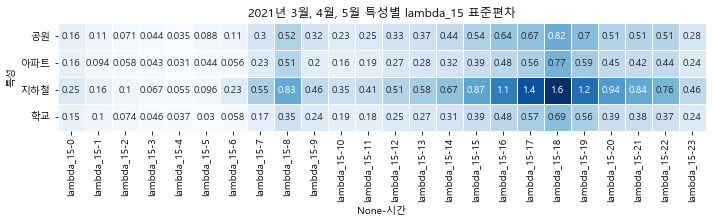

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.125292  0.076963  0.049654  0.029420  0.025939  0.057312  0.129132   
아파트  0.127681  0.083073  0.053783  0.035350  0.030913  0.060853  0.162045   
지하철  0.212748  0.135317  0.093637  0.061580  0.044914  0.050808  0.122025   
학교   0.111785  0.074952  0.046754  0.027807  0.025983  0.051240  0.116587   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.359796  0.493847  0.306459  0.284697  0.364288  0.413964  0.456365   
아파트  0.421881  0.532813  0.317310  0.271487  0.301811  0.351373  0.364094   
지하철  0.351930  0.744829  0.457436  0.383582  0.480849  0.583920  0.648941   
학교   0.287206  0.452576  0.273805  0.232914  0.264797  0.317898  0.336882   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.492746  0.576873  0.660708  0.753032  0.887464  0.593604  0.491421   
아파트  0.384306  0.423047  0.494337  0.568813  0.689376  0.506553  0.416037   
지하철  0.714367  0.805808  0.932488  1.183378  1.542540  1.067009  0.829522   
학교   0.360445  0.425383  0.516584  0.552877  0.589264  0.421010  0.345500   

                                   
시간         21        22        23  
특성                                 
공원   0.430920  0.373091  0.196259  
아파트  0.386459  0.337894  0.175512  
지하철  0.770923  0.657995  0.328289  
학교   0.329307  0.291338  0.167548

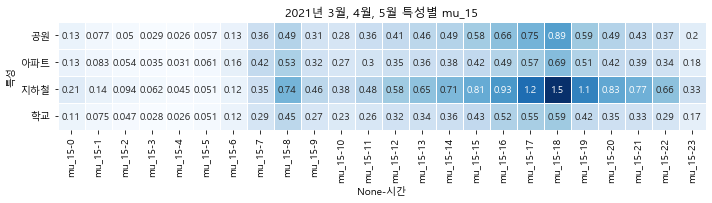

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [73]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.109129  0.066462  0.045631  0.033397  0.036020  0.072433  0.146465   
아파트  0.105661  0.072849  0.047493  0.034623  0.041591  0.074506  0.149750   
지하철  0.248718  0.151421  0.099694  0.068689  0.049334  0.059358  0.120604   
학교   0.108678  0.075607  0.048894  0.029288  0.034481  0.063213  0.126798   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.350148  0.472864  0.247532  0.217335  0.287397  0.347448  0.400884   
아파트  0.360725  0.465932  0.240928  0.202094  0.251174  0.269748  0.272719   
지하철  0.365272  0.795558  0.391283  0.297501  0.376685  0.465948  0.573249   
학교   0.310342  0.413277  0.219754  0.172768  0.196160  0.243435  0.266533   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.459702  0.558068  0.600759  0.677460  0.780538  0.517717  0.420671   
아파트  0.305591  0.385046  0.440245  0.525163  0.614051  0.425506  0.347918   
지하철  0.710786  0.893261  1.059279  1.234876  1.538058  1.108291  0.888936   
학교   0.291301  0.382728  0.444453  0.506741  0.594362  0.415757  0.324697   

                                   
시간         21        22        23  
특성                                 
공원   0.381712  0.317863  0.166074  
아파트  0.348900  0.306641  0.144048  
지하철  0.834344  0.703659  0.401757  
학교   0.339853  0.303394  0.159743

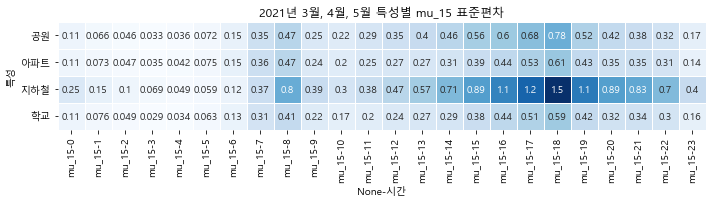

In [74]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [75]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.380783  1.771842  1.555274  1.653213  2.106644  2.413393  1.617041   
아파트  1.697193  1.578192  1.598651  1.538592  1.594564  1.295615  0.651702   
지하철  1.121556  1.304255  1.347020  1.414428  1.596698  2.430934  2.455618   
학교   1.660124  1.639515  1.709863  1.675643  1.652596  0.928243  0.953826   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.921166  1.211350  0.986402  0.849373  0.755890  0.886340  0.871068   
아파트  0.556873  0.743010  0.581831  0.633148  0.744846  0.810763  0.787721   
지하철  1.589576  1.189151  1.146735  1.062536  0.980429  0.995353  0.975041   
학교   3.003156  1.392375  1.097942  0.912783  0.770314  0.856067  0.868487   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.857878  0.854695  0.892846  0.976355  1.145785  1.261948  1.178250   
아파트  0.780034  0.866311  0.916848  1.076896  1.334773  1.422692  1.300190   
지하철  0.914899  0.924514  0.961795  0.990662  1.009444  1.058796  0.960535   
학교   0.825784  0.774742  0.765632  0.908022  1.225966  1.406995  1.221991   

                                   
시간         21        22        23  
특성                                 
공원   1.391852  1.577456  1.664607  
아파트  1.504461  1.904523  1.957175  
지하철  0.942493  1.029916  1.150490  
학교   1.423240  1.756381  1.714872

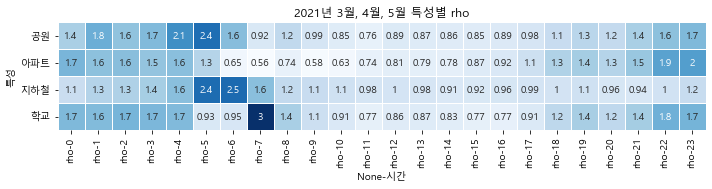

In [76]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 rho')
plt.tight_layout()
plt.show()

In [77]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.682418  2.941001  2.647932  2.661151  2.566610  1.509398  1.659086   
아파트  2.448627  2.359148  2.222585  2.100972  1.761926  0.915505  0.575911   
지하철  3.093469  3.594629  3.463096  3.469491  3.457772  4.057467  3.758838   
학교   1.864586  1.833865  1.766368  1.832953  1.469476  0.757867  0.764327   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.309800  1.829325  1.716480  1.544944  1.420691  1.815015  1.718106   
아파트  0.668237  0.871688  0.900843  1.034752  1.173992  1.489287  1.474800   
지하철  3.620895  3.293586  3.353747  3.261782  3.160595  3.342669  3.046568   
학교   1.083045  1.170192  1.053005  1.042427  1.132719  1.342508  1.260309   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.804161  1.832817  2.167032  2.343584  2.485548  2.811418  2.582884   
아파트  1.515054  1.593276  1.806177  2.013812  2.276440  2.422881  2.263072   
지하철  2.728504  2.885764  3.255492  3.377950  3.254729  3.384311  3.022690   
학교   1.311394  1.262272  1.308685  1.480537  1.716517  1.881966  1.760846   

                                   
시간         21        22        23  
특성                                 
공원   2.643707  2.896955  2.829429  
아파트  2.319700  2.529625  2.625471  
지하철  2.704395  3.029434  3.438934  
학교   1.712870  1.839083  1.955822

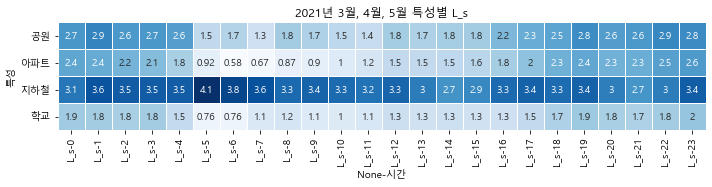

In [78]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 L_s')
plt.tight_layout()
plt.show()

In [79]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.443420  3.452734  3.403796  3.244279  3.891248  2.578650  2.956419   
아파트  2.951913  2.887761  2.817574  2.816923  2.653645  1.425141  1.300636   
지하철  3.593612  4.197473  4.510976  5.384034  5.705304  6.297428  5.629696   
학교   2.358755  2.252462  2.167395  2.586541  2.212024  1.389273  1.506647   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   2.450668  3.042346  2.491395  2.000203  1.626551  1.805934  1.668976   
아파트  1.400292  1.596254  1.245837  1.189651  1.200030  1.991670  1.822174   
지하철  5.892442  5.647755  5.532061  4.595383  4.686103  5.804098  4.508254   
학교   2.085330  2.184289  1.870975  1.401287  1.373625  1.812559  1.565333   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.805318  1.816199  2.500077  2.817462  3.128245  3.235902  3.086600   
아파트  2.049382  1.889321  2.182350  2.481227  2.704270  2.818010  2.704479   
지하철  2.721740  3.483216  5.190057  5.466240  5.891348  6.038365  5.803526   
학교   1.691971  1.665859  1.890685  2.098264  2.188951  2.369094  2.159235   

                                   
시간         21        22        23  
특성                                 
공원   3.213157  3.426793  3.366744  
아파트  2.671074  2.947008  3.015533  
지하철  5.748520  5.988226  5.871807  
학교   1.911462  2.079999  2.305397

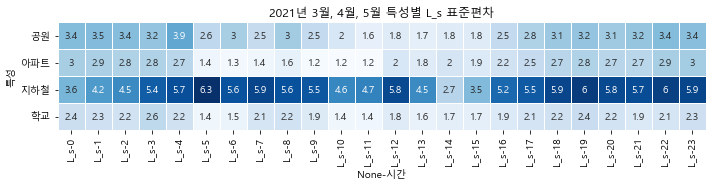

In [80]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [81]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                            \
시간          0          1          2           3           4           5    
특성                                                                         
공원   26.524693  65.709462  87.796008  145.309644  244.847010  109.606540   
아파트  21.473889  35.702347  57.404545  104.045990  111.433875   54.001220   
지하철  23.487541  48.880834  72.198188  124.161540  161.177701  162.383975   
학교   25.186277  42.932707  69.206322  115.877056  122.176838   60.056105   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   42.615656  11.095540  7.178604  8.834119  7.975193  5.987763  5.822412   
아파트  15.434377   5.187020  3.718679  5.101110  5.917602  5.528667  5.092039   
지하철  66.357622  18.465517  7.145240  9.330495  9.784240  7.427746  6.123107   
학교   35.649477  29.113076  7.363165  7.687320  7.128875  6.093729  5.292696   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   5.159384  4.890405  4.250464  3.902828  3.682020  3.388192  4.964915   
아파트  4.803897  4.647848  4.459827  3.975866  3.754682  3.419032  4.462512   
지하철  5.465602  4.889606  4.500546  4.056466  3.232984  2.553849  3.739217   
학교   4.954928  4.637368  3.948858  3.344858  3.381920  3.552779  4.888854   

                                              
시간         20        21        22         23  
특성                                            
공원   5.895398  7.163262  8.856074  16.507176  
아파트  5.290940  6.329183  7.810521  15.193557  
지하철  4.585656  4.914989  6.284627  15.089940  
학교   5.607683  6.807160  8.684253  15.396668

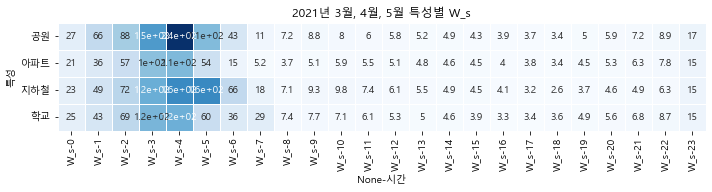

In [82]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 W_s')
plt.tight_layout()
plt.show()

In [83]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                              \
시간          0           1           2           3           4           5    
특성                                                                           
공원   21.931706  133.738702  221.816607  225.570378  522.146122  214.683814   
아파트  23.074247   40.251271   70.845440  169.564647  168.570807  121.875596   
지하철  24.495099   75.125576  131.280097  251.402389  254.897761  242.934741   
학교   36.355455   93.752080  101.910908  186.026346  186.204699  100.973875   

                                                                      \
시간           6          7          8          9         10        11   
특성                                                                     
공원    71.032342  17.315519   9.200579   8.310625  5.886690  3.742652   
아파트   35.382583  10.576222   5.591560   4.402404  4.558660  3.850758   
지하철  108.974821  38.107206   7.595450   8.119758  5.663367  3.772538   
학교    80.671171  95.542489  12.744410  10.004109  5.424687  4.064244   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   3.154340  2.833627  2.555804  2.216931  2.083913  2.093966  2.207602   
아파트  3.421452  3.180770  3.184396  2.919977  2.559781  2.494851  2.450661   
지하철  2.848436  2.400066  2.018627  1.838017  1.726686  1.541696  1.389684   
학교   3.193452  2.920060  2.698383  2.318095  2.031333  2.112025  2.394815   

                                                        
시간         19        20        21        22         23  
특성                                                      
공원   2.526434  3.449019  4.668673  6.206588  12.541510  
아파트  2.987890  3.589394  4.946468  6.506102  13.174830  
지하철  1.802832  2.338044  3.166362  4.575965  27.933504  
학교   2.987629  3.207491  5.715147  7.996798  14.127669

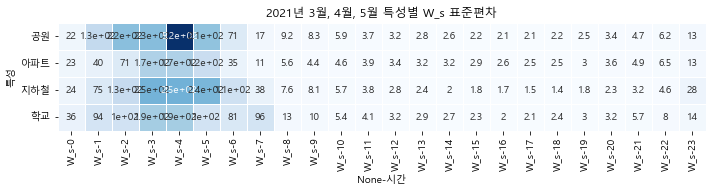

In [84]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 3월, 4월, 5월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()